# Alzheimer Disease and Healthy Aging Data In US

## 1. 导入数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Alzheimer Disease and Healthy Aging Data In US.csv')
df.columns

C:\Users\user\AppData\Local\Temp\ipykernel_18704\711520521.py:1: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Alzheimer Disease and Healthy Aging Data In US.csv')


Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'DataValueTypeID',
       'Data_Value_Type', 'Data_Value', 'Data_Value_Alt',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID',
       'LocationID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2'],
      dtype='object')

备份数据

In [3]:
old_df = df.copy(deep=True)

查看数据前5行

In [4]:
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,2020,2020,HI,Hawaii,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,NaN,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,5064,OVERALL,OVERALL
1,2017,2017,ID,Idaho,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,NaN,POINT (-114.36373 43.68263001),C05,TMC03,Q27,16,AGE,5064,OVERALL,OVERALL
2,2017,2017,ID,Idaho,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,NaN,POINT (-114.36373 43.68263001),C01,TOC11,Q43,16,AGE,5064,OVERALL,OVERALL
3,2018,2018,ID,Idaho,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,MEAN,...,NaN,POINT (-114.36373 43.68263001),C01,TOC01,Q08,16,AGE,5064,OVERALL,OVERALL
4,2020,2020,IN,Indiana,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,Male,POINT (-86.14996019 39.76691045),C05,TMC03,Q27,18,AGE,AGE_OVERALL,GENDER,MALE


In [5]:
df.info

<bound method DataFrame.info of         YearStart  YearEnd LocationAbbr LocationDesc Datasource  \
0            2020     2020           HI       Hawaii      BRFSS   
1            2017     2017           ID        Idaho      BRFSS   
2            2017     2017           ID        Idaho      BRFSS   
3            2018     2018           ID        Idaho      BRFSS   
4            2020     2020           IN      Indiana      BRFSS   
...           ...      ...          ...          ...        ...   
214457       2016     2016           WY      Wyoming      BRFSS   
214458       2015     2015           WY      Wyoming      BRFSS   
214459       2017     2017           WY      Wyoming      BRFSS   
214460       2016     2016           WY      Wyoming      BRFSS   
214461       2018     2018           WY      Wyoming      BRFSS   

                          Class  \
0                Overall Health   
1                 Mental Health   
2                Overall Health   
3                Overal

### columns 

    YearStart: The year the data collection began.
    YearEnd: The year the data collection ended.
    LocationAbbr: The abbreviation for the location where the data was collected.
    LocationDesc: The full name of the location where the data was collected.
    Datasource: The source of the data.
    Class: The class of the data.
    Topic: The topic of the data.
    Question: The question related to the data.
    Data_Value_Unit: The unit of measurement for the data value.
    DataValueTypeID: The ID for the type of data value.
    Data_Value_Type: The type of data value (e.g. mean, percentage).
    Data_Value: The actual data value.
    Data_Value_Alt: An alternative data value, if applicable.
    Low_Confidence_Limit: The lower limit of the confidence interval for the data value.
    High_Confidence_Limit: The upper limit of the confidence interval for the data value.
    Sample_Size: The size of the sample used to collect the data.
    StratificationCategory1: The first category used for stratification (e.g. age group).
    Stratification1: The specific stratification used (e.g. 18-24 years old).
    StratificationCategory2: The second category used for stratification, if applicable.
    Stratification2: The specific stratification used for the second category, if applicable.
    Geolocation: The latitude and longitude of the location where the data was collected.
    ClassID: The ID for the class of the data.
    TopicID: The ID for the topic of the data.
    QuestionID: The ID for the question related to the data.
    LocationID: The ID for the location where the data was collected.
    StratificationCategoryID1: The ID for the first category used for stratification.
    StratificationID1: The ID for the specific stratification used for the first category.
    StratificationCategoryID2: The ID for the second category used for stratification, if applicable.
    StratificationID2: The ID for the specific stratification used for the second category, if applicable.

In [6]:
for column in df.columns:
    print(column)

YearStart
YearEnd
LocationAbbr
LocationDesc
Datasource
Class
Topic
Question
Data_Value_Unit
DataValueTypeID
Data_Value_Type
Data_Value
Data_Value_Alt
Low_Confidence_Limit
High_Confidence_Limit
Sample_Size
StratificationCategory1
Stratification1
StratificationCategory2
Stratification2
Geolocation
ClassID
TopicID
QuestionID
LocationID
StratificationCategoryID1
StratificationID1
StratificationCategoryID2
StratificationID2


In [7]:
# 对dataframe的列的类型、样本、不同值的数量， 缺失值的比例
def df_dtype(data):
    cols, dtype_col, specimens, nunique, null_count,null_share = [], [], [], [], [],[]
    for column in data.columns:
        cols.append(column)
        this_dtype = data[column].dtype
        dtype_col.append(this_dtype)
        specimen = data.loc[data[column].first_valid_index(), column]
        specimens.append(specimen)
        this_nunique = data[column].nunique()
        nunique.append(this_nunique)
        null_sum = data[column].isna().sum()
        null_count.append(null_sum)
        null_percent = null_sum/len(data[column])
        null_share.append(f'{null_percent:.2%}')
    
    df = pd.DataFrame(list(zip(
            dtype_col,
            specimens,
            nunique,
            null_count,
            null_share
        )), index = cols)
    
    df.columns = [
        'dtype',
        'specimen',
        'nunique',
        'null_count',
        'null_share'
    ]
    return df
        

In [8]:
df[df.Sample_Size.notnull()]

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2


Sample_Size为空值，完全没有值，所以要去掉这一列

In [9]:
df = df.drop(columns='Sample_Size')

去掉Sample_Size后，其余属性的列的 类型（dtype）、采样（specimen）、不同取值的总数（nunique）、空值的数量（null_count）、空值所占的比例（null_share）如下：

In [10]:
df.columns = df.columns.str.lower()
df.columns

Index(['yearstart', 'yearend', 'locationabbr', 'locationdesc', 'datasource',
       'class', 'topic', 'question', 'data_value_unit', 'datavaluetypeid',
       'data_value_type', 'data_value', 'data_value_alt',
       'low_confidence_limit', 'high_confidence_limit',
       'stratificationcategory1', 'stratification1', 'stratificationcategory2',
       'stratification2', 'geolocation', 'classid', 'topicid', 'questionid',
       'locationid', 'stratificationcategoryid1', 'stratificationid1',
       'stratificationcategoryid2', 'stratificationid2'],
      dtype='object')

In [11]:
df_dtype(df)

,dtype,specimen,nunique,null_count,null_share
yearstart,int64,2020,6,0,0.00%
yearend,int64,2020,6,0,0.00%
locationabbr,object,HI,59,0,0.00%
locationdesc,object,Hawaii,59,0,0.00%
datasource,object,BRFSS,1,0,0.00%
class,object,Overall Health,7,0,0.00%
topic,object,Arthritis among older adults,39,0,0.00%
question,object,Percentage of older adults ever told they have...,39,0,0.00%
data_value_unit,object,%,2,0,0.00%
datavaluetypeid,object,PRCTG,2,0,0.00%


In [12]:
df.datasource.unique()

array(['BRFSS'], dtype=object)

In [13]:
print(df.data_value.dtype)
print(df.data_value_alt.dtype)

float64
float64


In [14]:
df[(df['data_value']!=df['data_value_alt']) & ((df['data_value'].notnull())|(df['data_value_alt'].notnull()))]

,yearstart,yearend,locationabbr,locationdesc,datasource,class,topic,question,data_value_unit,datavaluetypeid,...,stratification2,geolocation,classid,topicid,questionid,locationid,stratificationcategoryid1,stratificationid1,stratificationcategoryid2,stratificationid2


说明Data_Value_Alt和Data_Value是相同的

Datasource都是一样的，Data_Value_Unit 和 DataValueTypeID重复了，还有其他重复的数据

In [15]:
df = df.drop(columns=['datasource', 'locationdesc', 'data_value_unit', 'datavaluetypeid', 'data_value_alt',
                     'stratificationcategory1', 'stratification1', 'stratificationcategory2', 'stratification2',
                      'class', 'topic', 'question'])


In [16]:
df_dtype(df)

,dtype,specimen,nunique,null_count,null_share
yearstart,int64,2020,6,0,0.00%
yearend,int64,2020,6,0,0.00%
locationabbr,object,HI,59,0,0.00%
data_value_type,object,Percentage,2,0,0.00%
data_value,float64,26.3,999,69833,32.56%
low_confidence_limit,object,23.9,1967,69990,32.64%
high_confidence_limit,object,29.0,1966,69990,32.64%
geolocation,object,POINT (-157.8577494 21.30485044),54,23049,10.75%
classid,object,C01,7,0,0.00%
topicid,object,TOC11,39,0,0.00%


In [17]:
if df.duplicated().sum()>0:
    print(f'Amount of dumplicated rows:{df.duplicated().sum()}')
    df.drop_duplicates(inplace=True, ignore_index=True)
    print('Duplicated rows were dropped')
else:
    print('None')

None


说明没有完全重复的数据

##  2.数据分析

(1) yearstart<br>
(2) yearend

In [18]:
df.yearstart.isna().sum()

0

In [19]:
df.yearstart.isna().sum()

0

yearstart和yearend都没有缺失数据

In [20]:
df['yearstart'].unique()

array([2020, 2017, 2018, 2019, 2015, 2016], dtype=int64)

In [21]:
df[df['yearstart'] != df['yearend']]

,yearstart,yearend,locationabbr,data_value_type,data_value,low_confidence_limit,high_confidence_limit,geolocation,classid,topicid,questionid,locationid,stratificationcategoryid1,stratificationid1,stratificationcategoryid2,stratificationid2
33,2015,2020,AL,Percentage,NaN,NaN,NaN,POINT (-86.63186076 32.84057112),C06,TCC04,Q42,1,AGE,65PLUS,RACE,NAA
43,2015,2020,AZ,Percentage,65.0,56.8,72.5,POINT (-111.7638113 34.86597028),C07,TGC03,Q38,4,AGE,AGE_OVERALL,GENDER,MALE
74,2015,2020,AK,Percentage,75.9,63.0,85.3,POINT (-147.722059 64.84507996),C07,TGC03,Q38,2,AGE,65PLUS,GENDER,FEMALE
91,2015,2020,AL,Percentage,39.3,30.5,48.7,POINT (-86.63186076 32.84057112),C06,TCC03,Q41,1,AGE,AGE_OVERALL,GENDER,MALE
130,2015,2020,AK,Percentage,NaN,NaN,NaN,POINT (-147.722059 64.84507996),C07,TGC03,Q38,2,AGE,65PLUS,RACE,NAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214392,2015,2020,WY,Percentage,25.1,16.6,36.1,POINT (-108.1098304 43.23554134),C06,TCC02,Q31,56,AGE,65PLUS,RACE,WHT
214415,2015,2020,WY,Percentage,8.7,5.6,13.2,POINT (-108.1098304 43.23554134),C07,TGC05,Q40,56,AGE,5064,GENDER,FEMALE
214441,2015,2020,WY,Percentage,NaN,NaN,NaN,POINT (-108.1098304 43.23554134),C07,TGC05,Q40,56,AGE,65PLUS,RACE,HIS
214451,2015,2020,WY,Percentage,8.6,6.6,11.2,POINT (-108.1098304 43.23554134),C07,TGC05,Q40,56,AGE,AGE_OVERALL,OVERALL,OVERALL


看一下是否问题、地区都相同，这些长时间是否累计结果

In [22]:
df[(df['classid']=='C06')&(df['topicid']=='TCC04')&(df['questionid']=='Q42')&(df['locationid']==1) &
  (df['stratificationid1']=='AGE_OVERALL') & (df['stratificationid2']=='MALE')]

,yearstart,yearend,locationabbr,data_value_type,data_value,low_confidence_limit,high_confidence_limit,geolocation,classid,topicid,questionid,locationid,stratificationcategoryid1,stratificationid1,stratificationcategoryid2,stratificationid2
661,2015,2015,AL,Percentage,41.3,33.1,50.1,POINT (-86.63186076 32.84057112),C06,TCC04,Q42,1,AGE,AGE_OVERALL,GENDER,MALE
9321,2015,2020,AL,Percentage,43.0,34.2,52.2,POINT (-86.63186076 32.84057112),C06,TCC04,Q42,1,AGE,AGE_OVERALL,GENDER,MALE
9374,2019,2019,AL,Percentage,43.0,34.2,52.2,POINT (-86.63186076 32.84057112),C06,TCC04,Q42,1,AGE,AGE_OVERALL,GENDER,MALE


是百分比

In [23]:
df[df.locationabbr == 'AL']['topicid'].unique()

array(['TOC11', 'TSC04', 'TCC04', 'TOC10', 'TSC03', 'TOC13', 'TNC01',
       'TSC09', 'TAC01', 'TCC03', 'TOC03', 'TOC01', 'TOC04', 'TOC07',
       'TNC02', 'TSC02', 'TSC10', 'TSC08', 'TMC01', 'TOC09', 'TGC03',
       'TOC12', 'TNC04', 'TOC08', 'TSC07', 'TGC05', 'TMC03', 'TGC04',
       'TAC03', 'TOC05', 'TSC11', 'TCC01', 'TSC06', 'TCC02', 'TGC01',
       'TNC03', 'TSC01', 'TOC06', 'TGC02'], dtype=object)

In [24]:
df.describe()

,yearstart,yearend,data_value,locationid
count,214462.000000,214462.000000,144629.000000,214462.000000
mean,2017.378477,2017.634000,37.341956,800.987821
std,1.779822,1.778926,25.183017,2512.934094
min,2015.000000,2015.000000,0.000000,1.000000
25%,2016.000000,2016.000000,15.300000,18.000000
50%,2017.000000,2018.000000,32.500000,33.000000
75%,2019.000000,2019.000000,56.800000,49.000000
max,2020.000000,2020.000000,100.000000,9004.000000


In [25]:
df.locationabbr.unique()

array(['HI', 'ID', 'IN', 'IA', 'KS', 'KY', 'ME', 'MDW', 'NRE', 'SOU',
       'WEST', 'WI', 'WY', 'AL', 'AZ', 'AK', 'AR', 'CO', 'CT', 'GA', 'GU',
       'IL', 'MD', 'CA', 'FL', 'DC', 'DE', 'LA', 'MS', 'MO', 'NV', 'ND',
       'NY', 'OK', 'OH', 'MA', 'MI', 'MT', 'NE', 'MN', 'SD', 'TN', 'SC',
       'NM', 'NH', 'NJ', 'NC', 'OR', 'PA', 'PR', 'RI', 'TX', 'UT', 'US',
       'WA', 'VT', 'VA', 'WV', 'VI'], dtype=object)

查看数据的频数图

<Axes: >

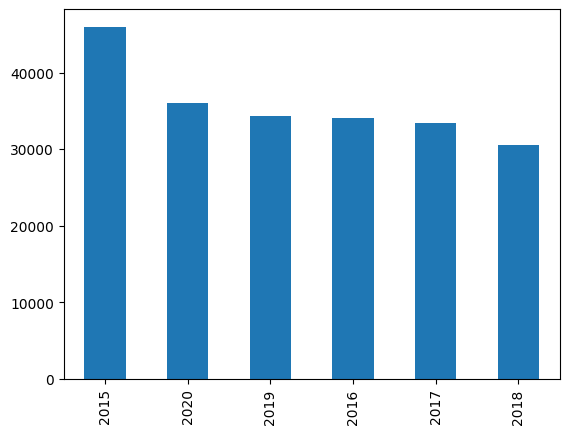

In [26]:
df.yearstart.value_counts().plot(kind='bar')

In [27]:
df.yearstart.info()

<class 'pandas.core.series.Series'>
RangeIndex: 214462 entries, 0 to 214461
Series name: yearstart
Non-Null Count   Dtype
--------------   -----
214462 non-null  int64
dtypes: int64(1)
memory usage: 1.6 MB


yearstart的五数概括如下

In [28]:
df.yearstart.describe()

count    214462.000000
mean       2017.378477
std           1.779822
min        2015.000000
25%        2016.000000
50%        2017.000000
75%        2019.000000
max        2020.000000
Name: yearstart, dtype: float64

In [29]:
df.yearend.info()

<class 'pandas.core.series.Series'>
RangeIndex: 214462 entries, 0 to 214461
Series name: yearend
Non-Null Count   Dtype
--------------   -----
214462 non-null  int64
dtypes: int64(1)
memory usage: 1.6 MB


频数直方图

<Axes: >

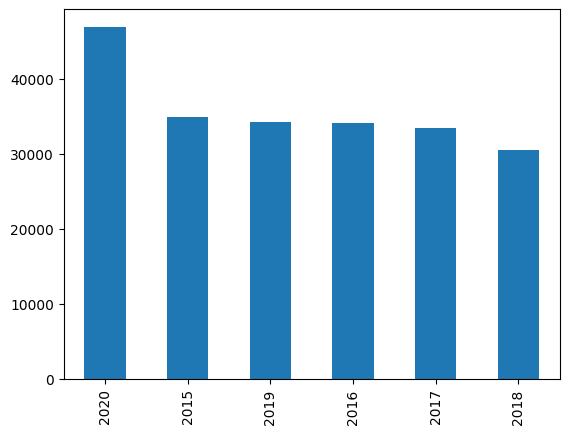

In [30]:
df.yearend.value_counts().plot(kind="bar")

(3)location

In [31]:
df.locationabbr.info()

<class 'pandas.core.series.Series'>
RangeIndex: 214462 entries, 0 to 214461
Series name: locationabbr
Non-Null Count   Dtype 
--------------   ----- 
214462 non-null  object
dtypes: object(1)
memory usage: 1.6+ MB


<Axes: >

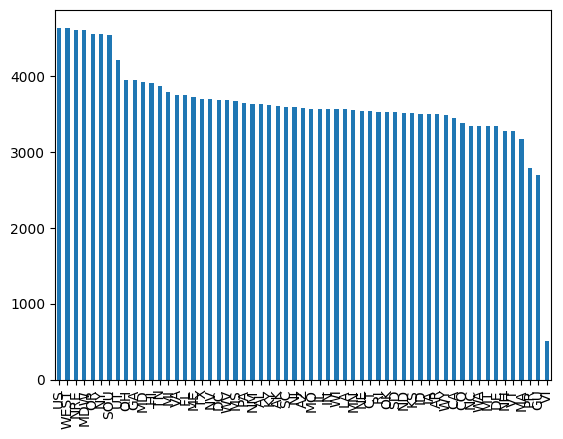

In [32]:
df.locationabbr.value_counts().plot(kind='bar')

(4)classid

In [33]:
df.classid.unique()

array(['C01', 'C05', 'C04', 'C03', 'C06', 'C02', 'C07'], dtype=object)

In [34]:
old_df.Class.unique()

array(['Overall Health', 'Mental Health', 'Smoking and Alcohol Use',
       'Screenings and Vaccines', 'Cognitive Decline',
       'Nutrition/Physical Activity/Obesity', 'Caregiving'], dtype=object)

In [35]:
df.classid.info()

<class 'pandas.core.series.Series'>
RangeIndex: 214462 entries, 0 to 214461
Series name: classid
Non-Null Count   Dtype 
--------------   ----- 
214462 non-null  object
dtypes: object(1)
memory usage: 1.6+ MB


分类的频数直方图

<Axes: >

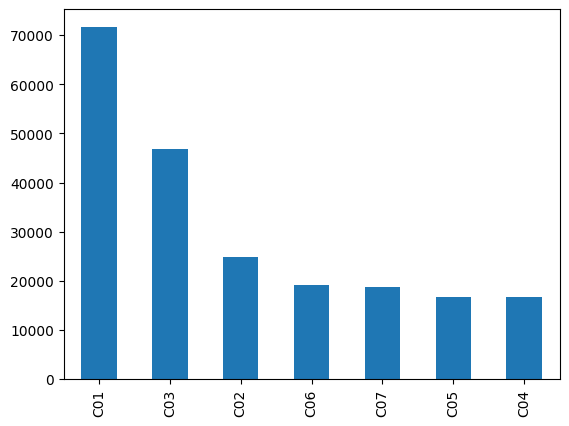

In [36]:
df.classid.value_counts().plot(kind='bar')

(5)topic

In [37]:
df.topicid.info()

<class 'pandas.core.series.Series'>
RangeIndex: 214462 entries, 0 to 214461
Series name: topicid
Non-Null Count   Dtype 
--------------   ----- 
214462 non-null  object
dtypes: object(1)
memory usage: 1.6+ MB


In [38]:
df.topicid.unique()

array(['TOC11', 'TMC03', 'TOC01', 'TOC09', 'TOC13', 'TMC01', 'TOC06',
       'TOC03', 'TAC03', 'TSC04', 'TCC04', 'TOC10', 'TSC09', 'TSC08',
       'TNC03', 'TSC03', 'TGC03', 'TSC10', 'TNC01', 'TNC04', 'TAC01',
       'TGC01', 'TCC03', 'TGC02', 'TOC05', 'TOC08', 'TOC04', 'TOC07',
       'TNC02', 'TSC02', 'TSC01', 'TSC11', 'TSC06', 'TCC02', 'TOC12',
       'TSC07', 'TGC05', 'TGC04', 'TCC01'], dtype=object)

<Axes: >

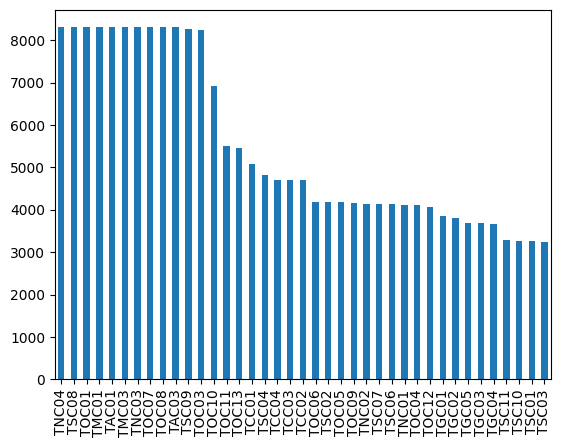

In [39]:
df.topicid.value_counts().plot(kind='bar')

(6)question

question是否有缺失值

In [40]:
df.questionid.isna().sum()

0

没有缺失值

In [41]:
len(df.questionid.unique())

39

In [42]:
df.questionid.unique()

array(['Q43', 'Q27', 'Q08', 'Q34', 'Q45', 'Q03', 'Q05', 'Q35', 'Q21',
       'Q19', 'Q42', 'Q46', 'Q09', 'Q18', 'Q16', 'Q20', 'Q38', 'Q10',
       'Q01', 'Q13', 'Q17', 'Q36', 'Q41', 'Q37', 'Q07', 'Q33', 'Q04',
       'Q32', 'Q02', 'Q15', 'Q12', 'Q11', 'Q14', 'Q31', 'Q44', 'Q22',
       'Q40', 'Q39', 'Q30'], dtype=object)

<Axes: >

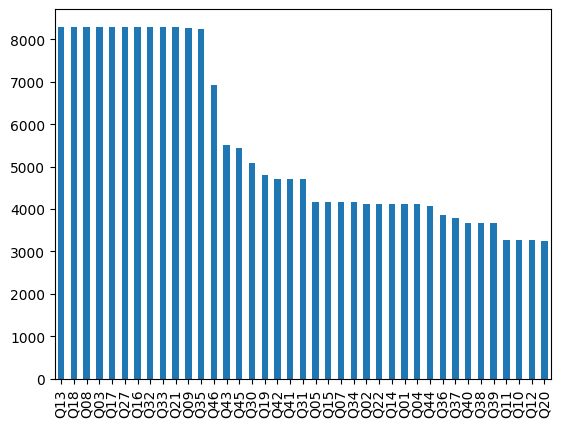

In [43]:
df.questionid.value_counts().plot(kind='bar')

(7)data_value_type

In [44]:
df.data_value_type.isna().sum()

0

没有缺失值

In [45]:
df.data_value_type.unique()

array(['Percentage', 'Mean'], dtype=object)

In [46]:
df.data_value_type.info()

<class 'pandas.core.series.Series'>
RangeIndex: 214462 entries, 0 to 214461
Series name: data_value_type
Non-Null Count   Dtype 
--------------   ----- 
214462 non-null  object
dtypes: object(1)
memory usage: 1.6+ MB


In [47]:
df.data_value_type.value_counts()

Percentage    197929
Mean           16533
Name: data_value_type, dtype: int64

两种数据的占比

<Axes: ylabel='data_value_type'>

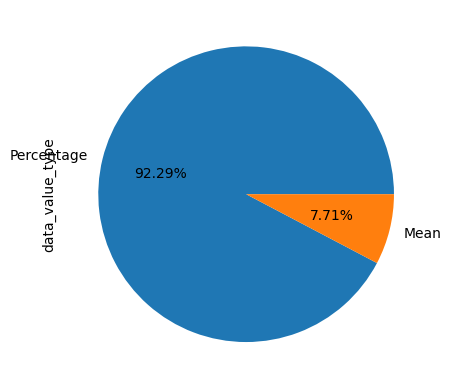

In [48]:
df.data_value_type.value_counts().plot(kind='pie',autopct='%.2f%%')

### 有两种数据类型，需要进行转换为同一种格式，因为Mean较少，都转换为百分比

(8)data_value

In [49]:
df.data_value.isna().sum()

69833

In [50]:
df.data_value.isna().sum()/len(df.data_value)

0.32561945705999196

data_value一项缺失的数据较多，不能直接删除，需要填充

In [51]:
df.data_value.info()

<class 'pandas.core.series.Series'>
RangeIndex: 214462 entries, 0 to 214461
Series name: data_value
Non-Null Count   Dtype  
--------------   -----  
144629 non-null  float64
dtypes: float64(1)
memory usage: 1.6 MB


(9)low_confidence_limit<br>
(10)high_confidence_limit

In [52]:
df.low_confidence_limit.info

<bound method Series.info of 0         23.9
1         21.2
2         32.5
3          4.0
4         12.1
          ... 
214457     NaN
214458     NaN
214459     NaN
214460     8.6
214461     NaN
Name: low_confidence_limit, Length: 214462, dtype: object>

该列的数据类型为object，需要转换为float类型

#### 置信度下线是否有异常值

In [53]:
# 统计 .的个数
list(df['low_confidence_limit']).count('.')

19

直接删除

In [54]:
# 将NaN替换为0
#df['low_confidence_limit'].replace('.', '0',inplace = True)
df.drop(df[df['low_confidence_limit']=='.'].index, inplace=True)

In [55]:
# 观察数据的分布，连续数据离散化
low_confident = pd.to_numeric(df.low_confidence_limit.dropna())

没有缺失的数据的5数分布如下：

In [56]:
low_confident.describe()

count    144453.000000
mean         32.736785
std          24.231769
min           0.000000
25%          12.000000
50%          26.900000
75%          49.100000
max          99.600000
Name: low_confidence_limit, dtype: float64

In [57]:
# 离散化
ret = pd.cut(low_confident,bins=20)
low_confident.groupby(ret).count()

low_confidence_limit
(-0.0996, 4.98]     9987
(4.98, 9.96]       19651
(9.96, 14.94]      13882
(14.94, 19.92]     12118
(19.92, 24.9]      11943
(24.9, 29.88]      11793
(29.88, 34.86]     10588
(34.86, 39.84]      8321
(39.84, 44.82]      6110
(44.82, 49.8]       4546
(49.8, 54.78]       3926
(54.78, 59.76]      4449
(59.76, 64.74]      5630
(64.74, 69.72]      6209
(69.72, 74.7]       4991
(74.7, 79.68]       3800
(79.68, 84.66]      2278
(84.66, 89.64]      1675
(89.64, 94.62]      1864
(94.62, 99.6]        692
Name: low_confidence_limit, dtype: int64

<Axes: xlabel='low_confidence_limit'>

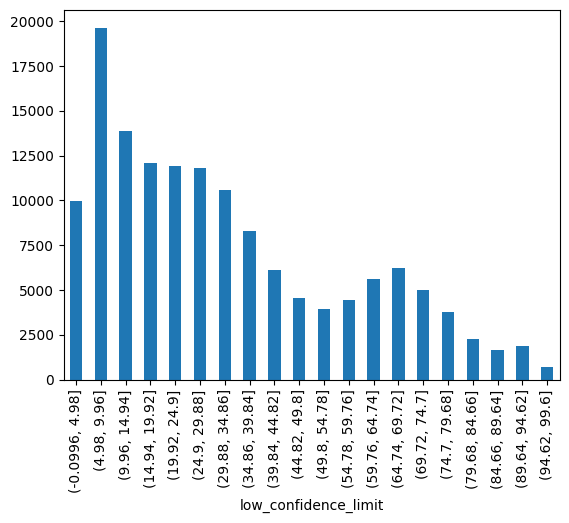

In [58]:
low_confident.groupby(ret).count().plot(kind='bar')

In [59]:
df['low_confidence_limit'] = df['low_confidence_limit'].astype('float')

In [60]:
df['low_confidence_limit'].info()

<class 'pandas.core.series.Series'>
Int64Index: 214443 entries, 0 to 214461
Series name: low_confidence_limit
Non-Null Count   Dtype  
--------------   -----  
144453 non-null  float64
dtypes: float64(1)
memory usage: 3.3 MB


In [61]:
df.low_confidence_limit.describe()

count    144453.000000
mean         32.736785
std          24.231769
min           0.000000
25%          12.000000
50%          26.900000
75%          49.100000
max          99.600000
Name: low_confidence_limit, dtype: float64

置信度上线的处理

In [62]:
# 统计 . 的个数
list(df['high_confidence_limit']).count('.')

0

In [63]:
# 将NaN替换为0
#df['high_confidence_limit'].replace('.', '100',inplace = True)
df.drop(df[df['high_confidence_limit']=='.'].index, inplace=True)

In [64]:
# 观察数据的分布，连续数据离散化
high_confident = pd.to_numeric(df.high_confidence_limit.dropna())

In [65]:
high_confident.describe()

count    144453.000000
mean         42.244436
std          26.172356
min           1.400000
25%          19.000000
50%          38.500000
75%          64.700000
max         100.000000
Name: high_confidence_limit, dtype: float64

In [66]:
# 离散化
ret = pd.cut(high_confident,bins=20)
high_confident.groupby(ret).count()

high_confidence_limit
(1.301, 6.33]      5921
(6.33, 11.26]     12604
(11.26, 16.19]    11761
(16.19, 21.12]     9949
(21.12, 26.05]     8782
(26.05, 30.98]     8677
(30.98, 35.91]     9718
(35.91, 40.84]     9058
(40.84, 45.77]     8324
(45.77, 50.7]      7577
(50.7, 55.63]      6366
(55.63, 60.56]     5239
(60.56, 65.49]     5220
(65.49, 70.42]     6656
(70.42, 75.35]     7226
(75.35, 80.28]     7338
(80.28, 85.21]     5307
(85.21, 90.14]     3206
(90.14, 95.07]     2836
(95.07, 100.0]     2688
Name: high_confidence_limit, dtype: int64

<Axes: xlabel='high_confidence_limit'>

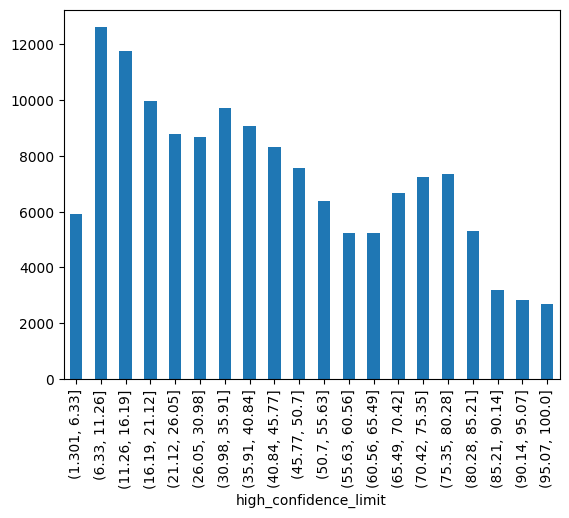

In [67]:
high_confident.groupby(ret).count().plot(kind='bar')

In [68]:
df['high_confidence_limit'] = df['high_confidence_limit'].astype('float')

In [69]:
df['high_confidence_limit'].info()

<class 'pandas.core.series.Series'>
Int64Index: 214443 entries, 0 to 214461
Series name: high_confidence_limit
Non-Null Count   Dtype  
--------------   -----  
144453 non-null  float64
dtypes: float64(1)
memory usage: 3.3 MB


缺失值较多不能直接删除

 超过置信区间的值进行处理

In [70]:
index = df[(df['data_value']<=df['low_confidence_limit']) |(df['data_value']>=df['high_confidence_limit'])].index

In [71]:
index

Int64Index([179540, 180341], dtype='int64')

对与超过置信区间的记录直接删除

In [72]:
df = df.drop(labels=index)

因为不同地区不同主题的分类不同

In [73]:
df[(df['locationabbr']=='HI') & (df['questionid']=='Q43')]

,yearstart,yearend,locationabbr,data_value_type,data_value,low_confidence_limit,high_confidence_limit,geolocation,classid,topicid,questionid,locationid,stratificationcategoryid1,stratificationid1,stratificationcategoryid2,stratificationid2
0,2020,2020,HI,Percentage,26.3,23.9,29.0,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,5064,OVERALL,OVERALL
33488,2019,2019,HI,Percentage,31.2,22.5,41.4,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,5064,RACE,HIS
33519,2017,2017,HI,Percentage,NaN,NaN,NaN,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,AGE_OVERALL,RACE,NAA
33596,2020,2020,HI,Percentage,23.5,19.8,27.6,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,5064,RACE,ASN
34097,2019,2019,HI,Percentage,36.5,33.9,39.2,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,AGE_OVERALL,GENDER,FEMALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55006,2015,2015,HI,Percentage,30.4,27.9,33.0,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,AGE_OVERALL,GENDER,MALE
55073,2017,2017,HI,Percentage,47.8,43.8,51.9,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,65PLUS,GENDER,FEMALE
55312,2017,2017,HI,Percentage,NaN,NaN,NaN,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,65PLUS,RACE,NAA
55762,2017,2017,HI,Percentage,35.4,28.4,43.1,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,AGE_OVERALL,RACE,HIS


查看某个地区下内，问题为空值的记录

In [74]:
df[(df['locationabbr']=='HI') & (df['questionid']=='Q43')
  & (df['data_value'].empty)]

,yearstart,yearend,locationabbr,data_value_type,data_value,low_confidence_limit,high_confidence_limit,geolocation,classid,topicid,questionid,locationid,stratificationcategoryid1,stratificationid1,stratificationcategoryid2,stratificationid2


In [75]:
questionlist = [df.questionid.unique()]

In [76]:
questionlist

[array(['Q43', 'Q27', 'Q08', 'Q34', 'Q45', 'Q03', 'Q05', 'Q35', 'Q21',
        'Q19', 'Q42', 'Q46', 'Q09', 'Q18', 'Q16', 'Q20', 'Q38', 'Q10',
        'Q01', 'Q13', 'Q17', 'Q36', 'Q41', 'Q37', 'Q07', 'Q33', 'Q04',
        'Q32', 'Q02', 'Q15', 'Q12', 'Q11', 'Q14', 'Q31', 'Q44', 'Q22',
        'Q40', 'Q39', 'Q30'], dtype=object)]

查看有哪些问题的value值为空

In [77]:
# 有哪些问题的data value为空
question_datavalue_null = df[df['data_value'].isnull()]['questionid'].unique().tolist()
question_datavalue_null

['Q45',
 'Q42',
 'Q20',
 'Q01',
 'Q09',
 'Q13',
 'Q04',
 'Q32',
 'Q03',
 'Q15',
 'Q10',
 'Q17',
 'Q07',
 'Q36',
 'Q31',
 'Q19',
 'Q38',
 'Q02',
 'Q35',
 'Q41',
 'Q40',
 'Q21',
 'Q39',
 'Q08',
 'Q27',
 'Q44',
 'Q22',
 'Q43',
 'Q12',
 'Q30',
 'Q34',
 'Q11',
 'Q05',
 'Q46',
 'Q16',
 'Q14',
 'Q18',
 'Q33',
 'Q37']

In [78]:
question = df['questionid'].unique().tolist()
question

['Q43',
 'Q27',
 'Q08',
 'Q34',
 'Q45',
 'Q03',
 'Q05',
 'Q35',
 'Q21',
 'Q19',
 'Q42',
 'Q46',
 'Q09',
 'Q18',
 'Q16',
 'Q20',
 'Q38',
 'Q10',
 'Q01',
 'Q13',
 'Q17',
 'Q36',
 'Q41',
 'Q37',
 'Q07',
 'Q33',
 'Q04',
 'Q32',
 'Q02',
 'Q15',
 'Q12',
 'Q11',
 'Q14',
 'Q31',
 'Q44',
 'Q22',
 'Q40',
 'Q39',
 'Q30']

In [79]:
question_datavalue_notnull = list[set(question)-set(question_datavalue_null)]
question_datavalue_notnull

list[set()]

说明每个问题都有缺失的情况

###### 每个问题都有缺失的部分记录

查询有上下限，但是没有值的列

In [80]:
df[(df['data_value'].isna()) & ((df['low_confidence_limit'].notnull())) & ((df['high_confidence_limit'].notnull()))]

,yearstart,yearend,locationabbr,data_value_type,data_value,low_confidence_limit,high_confidence_limit,geolocation,classid,topicid,questionid,locationid,stratificationcategoryid1,stratificationid1,stratificationcategoryid2,stratificationid2


In [81]:
df[(df['locationabbr']=='HI') & (df['questionid']=='Q43')]

,yearstart,yearend,locationabbr,data_value_type,data_value,low_confidence_limit,high_confidence_limit,geolocation,classid,topicid,questionid,locationid,stratificationcategoryid1,stratificationid1,stratificationcategoryid2,stratificationid2
0,2020,2020,HI,Percentage,26.3,23.9,29.0,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,5064,OVERALL,OVERALL
33488,2019,2019,HI,Percentage,31.2,22.5,41.4,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,5064,RACE,HIS
33519,2017,2017,HI,Percentage,NaN,NaN,NaN,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,AGE_OVERALL,RACE,NAA
33596,2020,2020,HI,Percentage,23.5,19.8,27.6,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,5064,RACE,ASN
34097,2019,2019,HI,Percentage,36.5,33.9,39.2,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,AGE_OVERALL,GENDER,FEMALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55006,2015,2015,HI,Percentage,30.4,27.9,33.0,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,AGE_OVERALL,GENDER,MALE
55073,2017,2017,HI,Percentage,47.8,43.8,51.9,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,65PLUS,GENDER,FEMALE
55312,2017,2017,HI,Percentage,NaN,NaN,NaN,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,65PLUS,RACE,NAA
55762,2017,2017,HI,Percentage,35.4,28.4,43.1,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,AGE_OVERALL,RACE,HIS


使用相同地区的相同问题的均值填写

In [82]:
df_dtype(df)

,dtype,specimen,nunique,null_count,null_share
yearstart,int64,2020,6,0,0.00%
yearend,int64,2020,6,0,0.00%
locationabbr,object,HI,59,0,0.00%
data_value_type,object,Percentage,2,0,0.00%
data_value,float64,26.3,998,69833,32.57%
low_confidence_limit,float64,23.9,991,69990,32.64%
high_confidence_limit,float64,29.0,986,69990,32.64%
geolocation,object,POINT (-157.8577494 21.30485044),54,23028,10.74%
classid,object,C01,7,0,0.00%
topicid,object,TOC11,39,0,0.00%


使用相同问题的均值来填写空值

In [83]:
for question in  question_datavalue_null:
    catory1 = df[df['questionid']==question]['stratificationid1'].unique().tolist()
    for catory in catory1:
        
        mean = df[(df['questionid']==question) & (df['data_value']!='') & (df['stratificationid1']==catory)]['data_value'].mean()
        index = df[(df['questionid']==question) & (pd.isna(df['data_value']))& (df['stratificationid1']==catory)]['data_value'].index
        # mask = (data['sex']=='male')
        mask = (df['questionid']==question) & (df['data_value'].isna())& (df['stratificationid1']==catory)
        df.loc[index, 'data_value'] = mean
        print(mean)
    
#     for i in index:
#         df1.loc[i, 'Data_Value'] = mean
        
#         value.loc[i] = mean
#     df1['Data_Value'] = value
    #df1['Data_Value'].iloc[index].replace(np.nan, mean, inplace = True)
    

36.16899038461538
33.83654513888889
36.98893653516295
40.06641949152542
49.701142857142855
45.156042884990256
66.73095975232198
77.80831946755409
48.611754068716095
31.6260736196319
33.167698259187624
34.91218441273326
40.9587807606264
69.64714056654196
59.395736241943474
29.809863760217983
36.877964376590334
34.161943513642896
87.2951219512195
82.20262008733623
92.29229910714285
26.457677725118483
27.221965628356607
24.69868087265348
11.03303239511418
7.831409062693979
13.127728285077952
62.56546546546547
67.60872794800372
76.76196120689656
42.024693520140104
32.80635155096012
27.409000000000002
15.904859335038363
9.708002406738869
19.765357719203873
72.38412984670875
63.29545454545455
79.26407480314961
21.89421052631579
24.065131578947366
19.060162601626015
39.57497546614328
45.76297142857143
31.781716833890748
67.18522821576764
66.24911971830984
68.32940092165899
71.43853317811408
71.68845671267252
71.3285018270402
14.601428571428572
16.42334455667789
15.61281779661017
6.51676954732

In [84]:

df[(df['questionid']=='Q43') ]['data_value']

0         26.3
2         35.7
8         20.5
10        47.9
23        41.9
          ... 
214253    33.1
214275    28.1
214330    43.1
214429    50.5
214433    44.3
Name: data_value, Length: 5511, dtype: float64

In [85]:
print(pd.isna(df.loc[32,'data_value']))

False


In [86]:
df[(df['questionid']=='Q43') ]['data_value']

0         26.3
2         35.7
8         20.5
10        47.9
23        41.9
          ... 
214253    33.1
214275    28.1
214330    43.1
214429    50.5
214433    44.3
Name: data_value, Length: 5511, dtype: float64

In [87]:
df['data_value'].isnull().value_counts()

False    214441
Name: data_value, dtype: int64

填充完后的列属性

In [88]:
df_dtype(df)

,dtype,specimen,nunique,null_count,null_share
yearstart,int64,2020,6,0,0.00%
yearend,int64,2020,6,0,0.00%
locationabbr,object,HI,59,0,0.00%
data_value_type,object,Percentage,2,0,0.00%
data_value,float64,26.3,1115,0,0.00%
low_confidence_limit,float64,23.9,991,69990,32.64%
high_confidence_limit,float64,29.0,986,69990,32.64%
geolocation,object,POINT (-157.8577494 21.30485044),54,23028,10.74%
classid,object,C01,7,0,0.00%
topicid,object,TOC11,39,0,0.00%


填充置信上下限，使用相同问题均值进行填写

填充下限

In [89]:
for question in  question_datavalue_null:
    catory1 = df[df['questionid']==question]['stratificationid1'].unique().tolist()
    for catory in catory1:
        mean = df[(df['questionid']==question) & (df['low_confidence_limit']!='')& (df['stratificationid1']==catory)]['low_confidence_limit'].mean()
        index = df[(df['questionid']==question) & (pd.isna(df['low_confidence_limit']))& (df['stratificationid1']==catory)]['low_confidence_limit'].index
        # mask = (data['sex']=='male')
        mask = (df['questionid']==question) & (df['low_confidence_limit'].isna())& (df['stratificationid1']==catory)
        df.loc[index, 'low_confidence_limit'] = mean
    #print(mean)
    

填充上限

In [90]:
for question in  question_datavalue_null:
    catory1 = df[df['questionid']==question]['stratificationid1'].unique().tolist()
    for catory in catory1:
        mean = df[(df['questionid']==question) & (df['high_confidence_limit']!='')& (df['stratificationid1']==catory)]['high_confidence_limit'].mean()
        index = df[(df['questionid']==question) & (pd.isna(df['high_confidence_limit']))& (df['stratificationid1']==catory)]['high_confidence_limit'].index
        # mask = (data['sex']=='male')
        mask = (df['questionid']==question) & (df['high_confidence_limit'].isna())& (df['stratificationid1']==catory)
        df.loc[index, 'high_confidence_limit'] = mean
        #print(mean)
    

查看填充结果

In [91]:
df_dtype(df)

,dtype,specimen,nunique,null_count,null_share
yearstart,int64,2020,6,0,0.00%
yearend,int64,2020,6,0,0.00%
locationabbr,object,HI,59,0,0.00%
data_value_type,object,Percentage,2,0,0.00%
data_value,float64,26.3,1115,0,0.00%
low_confidence_limit,float64,23.9,1108,0,0.00%
high_confidence_limit,float64,29.0,1103,0,0.00%
geolocation,object,POINT (-157.8577494 21.30485044),54,23028,10.74%
classid,object,C01,7,0,0.00%
topicid,object,TOC11,39,0,0.00%


上下限都已经填充完毕，现在看一下，填充的是否符合上下限的要求

In [92]:
index = df[(df['data_value']<=df['low_confidence_limit']) |(df['data_value']>=df['high_confidence_limit'])].index

In [94]:
index

Int64Index([ 78097,  78187,  78433,  78581,  78773,  78951,  79057,  79295,
             79663,  79887,
            ...
            208300, 208786, 209582, 209639, 209839, 210562, 210645, 210703,
            211059, 211330],
           dtype='int64', length=157)

In [93]:
df.drop(index,inplace=True)

In [95]:
df_dtype(df)

,dtype,specimen,nunique,null_count,null_share
yearstart,int64,2020,6,0,0.00%
yearend,int64,2020,6,0,0.00%
locationabbr,object,HI,59,0,0.00%
data_value_type,object,Percentage,2,0,0.00%
data_value,float64,26.3,1114,0,0.00%
low_confidence_limit,float64,23.9,1108,0,0.00%
high_confidence_limit,float64,29.0,1103,0,0.00%
geolocation,object,POINT (-157.8577494 21.30485044),54,22871,10.67%
classid,object,C01,7,0,0.00%
topicid,object,TOC11,39,0,0.00%


由上表可以知道：位置类别比地区类别要少可以使用相同地区的坐标填充

In [100]:
point_null_location = df[df['geolocation'].isna()]['locationabbr'].unique()
point_null_location

array(['MDW', 'NRE', 'SOU', 'WEST', 'US'], dtype=object)

原数据中，这些地点的坐标如下所示：

In [106]:
df_loc_geo = pd.DataFrame(list(zip(df['locationabbr'],df['geolocation'])))
df_loc_geo.columns = ['locationabbr','geolocation']
if df_loc_geo.duplicated().sum()>0:
    print(f'Amount of dumplicated rows:{df_loc_geo.duplicated().sum()}')
    df_loc_geo.drop_duplicates(inplace=True, ignore_index=True)
    print('Duplicated rows were dropped')
else:
    print('None')

Amount of dumplicated rows:214225
Duplicated rows were dropped


In [107]:
df_loc_geo

,locationabbr,geolocation
0,HI,POINT (-157.8577494 21.30485044)
1,ID,POINT (-114.36373 43.68263001)
2,IN,POINT (-86.14996019 39.76691045)
3,IA,POINT (-93.81649056 42.46940091)
4,KS,POINT (-98.20078123 38.3477403)
5,KY,POINT (-84.77497105 37.64597027)
6,ME,POINT (-68.98503134 45.25422889)
7,MDW,NaN
8,NRE,NaN
9,SOU,NaN


原来的数据中没有['MDW', 'NRE', 'SOU', 'WEST', 'US']的坐标位置，因此无法填充

## 3.新旧数据对比

原数据

In [108]:
old_df

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,2020,2020,HI,Hawaii,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,NaN,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,5064,OVERALL,OVERALL
1,2017,2017,ID,Idaho,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,NaN,POINT (-114.36373 43.68263001),C05,TMC03,Q27,16,AGE,5064,OVERALL,OVERALL
2,2017,2017,ID,Idaho,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,NaN,POINT (-114.36373 43.68263001),C01,TOC11,Q43,16,AGE,5064,OVERALL,OVERALL
3,2018,2018,ID,Idaho,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,MEAN,...,NaN,POINT (-114.36373 43.68263001),C01,TOC01,Q08,16,AGE,5064,OVERALL,OVERALL
4,2020,2020,IN,Indiana,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,Male,POINT (-86.14996019 39.76691045),C05,TMC03,Q27,18,AGE,AGE_OVERALL,GENDER,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214457,2016,2016,WY,Wyoming,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,MEAN,...,"Black, non-Hispanic",POINT (-108.1098304 43.23554134),C01,TOC01,Q08,56,AGE,5064,RACE,BLK
214458,2015,2015,WY,Wyoming,BRFSS,Smoking and Alcohol Use,Current smoking,Percentage of older adults who have smoked at ...,%,PRCTG,...,Asian/Pacific Islander,POINT (-108.1098304 43.23554134),C04,TAC01,Q17,56,AGE,65PLUS,RACE,ASN
214459,2017,2017,WY,Wyoming,BRFSS,Overall Health,Self-rated health (fair to poor health),Percentage of older adults who self-reported t...,%,PRCTG,...,Native Am/Alaskan Native,POINT (-108.1098304 43.23554134),C01,TOC07,Q32,56,AGE,AGE_OVERALL,RACE,NAA
214460,2016,2016,WY,Wyoming,BRFSS,Overall Health,Fall with injury within last year,Percentage of older adults who have fallen and...,%,PRCTG,...,NaN,POINT (-108.1098304 43.23554134),C01,TOC06,Q05,56,AGE,5064,OVERALL,OVERALL


In [111]:
old_df =old_df.drop(columns='Sample_Size')
df_dtype(old_df)

,dtype,specimen,nunique,null_count,null_share
YearStart,int64,2020,6,0,0.00%
YearEnd,int64,2020,6,0,0.00%
LocationAbbr,object,HI,59,0,0.00%
LocationDesc,object,Hawaii,59,0,0.00%
Datasource,object,BRFSS,1,0,0.00%
Class,object,Overall Health,7,0,0.00%
Topic,object,Arthritis among older adults,39,0,0.00%
Question,object,Percentage of older adults ever told they have...,39,0,0.00%
Data_Value_Unit,object,%,2,0,0.00%
DataValueTypeID,object,PRCTG,2,0,0.00%


处理后的新数据

In [112]:
df

,yearstart,yearend,locationabbr,data_value_type,data_value,low_confidence_limit,high_confidence_limit,geolocation,classid,topicid,questionid,locationid,stratificationcategoryid1,stratificationid1,stratificationcategoryid2,stratificationid2
0,2020,2020,HI,Percentage,26.300000,23.900000,29.000000,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,5064,OVERALL,OVERALL
1,2017,2017,ID,Percentage,24.000000,21.200000,27.000000,POINT (-114.36373 43.68263001),C05,TMC03,Q27,16,AGE,5064,OVERALL,OVERALL
2,2017,2017,ID,Percentage,35.700000,32.500000,39.100000,POINT (-114.36373 43.68263001),C01,TOC11,Q43,16,AGE,5064,OVERALL,OVERALL
3,2018,2018,ID,Mean,4.800000,4.000000,5.500000,POINT (-114.36373 43.68263001),C01,TOC01,Q08,16,AGE,5064,OVERALL,OVERALL
4,2020,2020,IN,Percentage,13.700000,12.100000,15.400000,POINT (-86.14996019 39.76691045),C05,TMC03,Q27,18,AGE,AGE_OVERALL,GENDER,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214457,2016,2016,WY,Mean,5.284540,4.262815,6.306728,POINT (-108.1098304 43.23554134),C01,TOC01,Q08,56,AGE,5064,RACE,BLK
214458,2015,2015,WY,Percentage,9.708002,7.512816,12.586703,POINT (-108.1098304 43.23554134),C04,TAC01,Q17,56,AGE,65PLUS,RACE,ASN
214459,2017,2017,WY,Percentage,26.457678,22.457346,30.947725,POINT (-108.1098304 43.23554134),C01,TOC07,Q32,56,AGE,AGE_OVERALL,RACE,NAA
214460,2016,2016,WY,Percentage,10.600000,8.600000,13.000000,POINT (-108.1098304 43.23554134),C01,TOC06,Q05,56,AGE,5064,OVERALL,OVERALL


In [114]:
df_dtype(df)

,dtype,specimen,nunique,null_count,null_share
yearstart,int64,2020,6,0,0.00%
yearend,int64,2020,6,0,0.00%
locationabbr,object,HI,59,0,0.00%
data_value_type,object,Percentage,2,0,0.00%
data_value,float64,26.3,1114,0,0.00%
low_confidence_limit,float64,23.9,1108,0,0.00%
high_confidence_limit,float64,29.0,1103,0,0.00%
geolocation,object,POINT (-157.8577494 21.30485044),54,22871,10.67%
classid,object,C01,7,0,0.00%
topicid,object,TOC11,39,0,0.00%


新旧数据差异

<ol>
    <li>对一些相识的属性进行分析，删掉了一些含义相同的属性</li>
    <li>删除了置信上下限中异常数据</li>
    <li>对数据类型进行了修改，例如置信上下限的数据类型修改为float64</li>
    <li>对数据进行了填充，data_value使用相同问题的相同一级分类的平均值进行填充，对上下限的填充也是同样的</li>
    <li>在填充后，不合理的数据进行分析，由于数量较少，直接删除</li>
</ol>